In [84]:
import pandas as pd
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt #to plot graphs
import matplotlib.patches as mpatches #to customize legend
import seaborn as sns #to plot graphs
import math 
import re #to find integers & floats in a string 
from collections import Counter #to count values in a dataframe or array
from datetime import date, timedelta, datetime #for the date
import datetime as dt
from sklearn.model_selection import train_test_split

In [85]:
test=pd.read_csv("test_set.csv")
np.unique(test["hotel_id"])


array([  0,   7,  17,  22,  26,  30,  43,  46,  56,  68,  71,  73,  75,
        77,  81,  83,  88, 106, 108, 114, 120, 122, 124, 131, 134, 139,
       140, 160, 161, 162, 164, 166, 169, 187, 191, 194, 197, 209, 212,
       222, 228, 231, 233, 238, 249, 252, 253, 258, 262, 263, 265, 278,
       279, 281, 282, 283, 284, 286, 288, 292, 297, 301, 305, 310, 319,
       321, 323, 346, 350, 351, 359, 367, 370, 372, 374, 385, 389, 395,
       399, 410, 415, 418, 420, 421, 423, 426, 430, 432, 439, 440, 441,
       446, 449, 454, 455, 456, 459, 465, 470, 474, 479, 482, 483, 484,
       488, 489, 491, 494, 507, 509, 514, 519, 526, 529, 540, 579, 582,
       591, 609, 624, 625, 647, 648, 652, 653, 655, 658, 672, 673, 674,
       677, 679, 681, 683, 685, 699, 702, 703, 710, 715, 720, 731, 737,
       744, 754, 764, 769, 787, 788, 799, 800, 811, 827, 830, 831, 836,
       837, 843, 845, 852, 853, 855, 856, 866, 867, 871, 890, 894, 899,
       915, 918, 935, 939, 943, 951, 952, 954, 957, 962, 966, 97

In [86]:
np.unique(pricing_requests["hotel_id"])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [87]:
def plotDates(data):
    """
    Cette fonction trace la répartition de la variable date
    """
    
    dates_requests = data[["request_number","date"]].drop_duplicates()
    
    fig, ax = plt.subplots(figsize=(20,8))

    counts, edges, bars = ax.hist(dates_requests.date,bins=len(dates_requests)//10, density=False,alpha = .5)

    ax.bar_label(bars,padding = 1,size = 12)
    ax.set_xticks(np.arange(0,41))
    ax.set_title("Nombre d'avatars par nombre de requêtes réalisées")
    ax.set_xlabel("valeur de date")
    ax.set_ylabel("nombre d'occurrences")

    ax.spines[['top','right','left']].set_visible(False)
    plt.show()

In [88]:
descriptive_analysis=True

In [89]:
# Lecture du fichier des données tests
#----------------------------------------------
PATH = '.' #modifier si besoin le chemin du fichier
pricing_requests = pd.read_csv(PATH + '//pricing_requests_done.csv')

hotels = pd.read_csv('features_hotels.csv', index_col=['hotel_id', 'city'])

pricing_requests.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id,request_number
0,105,144,102,amsterdam,39,austrian,1,6056,1.0
1,880,113,81,amsterdam,39,austrian,1,6056,1.0
2,588,172,108,amsterdam,39,austrian,1,6056,1.0
3,352,105,84,amsterdam,39,austrian,1,6056,1.0
4,925,103,83,amsterdam,39,austrian,1,6056,1.0


In [90]:
# Assigner le bon type aux variables
#----------------------------------------------
#--- Convert to integer: 
int_list = ["date","avatar_id","hotel_id","stock","request_number"] #"request_number",
pricing_requests[int_list] = pricing_requests[int_list].astype(int) 
#--- Convert to categorical: 
pricing_requests["city"] = pd.Categorical(pricing_requests["city"],ordered=False)
pricing_requests["language"] = pd.Categorical(pricing_requests["language"],ordered=False)
pricing_requests["mobile"] = pd.Categorical(pricing_requests["mobile"],ordered=False)

In [91]:
#obtenir des features en plus correspondant aux features de l'hotel : on fait une jointure 
pricing_requests = pricing_requests.join(hotels, on=['hotel_id', 'city'])
pricing_requests.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id,request_number,group,brand,parking,pool,children_policy
0,105,144,102,amsterdam,39,austrian,1,6056,1,Yin Yang,Ardisson,0,0,0
1,880,113,81,amsterdam,39,austrian,1,6056,1,Boss Western,Boss Western,0,0,0
2,588,172,108,amsterdam,39,austrian,1,6056,1,Independant,Independant,0,0,0
3,352,105,84,amsterdam,39,austrian,1,6056,1,Independant,Independant,1,0,0
4,925,103,83,amsterdam,39,austrian,1,6056,1,Boss Western,Boss Western,1,0,0


In [92]:
np.unique(pricing_requests["group"])

array(['Accar Hotels', 'Boss Western', 'Chillton Worldwide',
       'Independant', 'Morriott International', 'Yin Yang'], dtype=object)

In [93]:
np.unique(pricing_requests["brand"])

array(['8 Premium', 'Ardisson', 'Boss Western', 'Chill Garden Inn',
       'Corlton', 'CourtYord', 'Ibas', 'Independant', 'J.Halliday Inn',
       'Marcure', 'Morriot', 'Navatel', 'Quadrupletree', 'Royal Lotus',
       'Safitel', 'Tripletree'], dtype=object)

In [94]:
pricing_requests["group"] = pd.Categorical(pricing_requests["group"],ordered=False)
pricing_requests["brand"] = pd.Categorical(pricing_requests["brand"],ordered=False)
int_list = ["pool", "parking", "children_policy"] #"request_number",
pricing_requests[int_list] = pricing_requests[int_list].astype(int) 

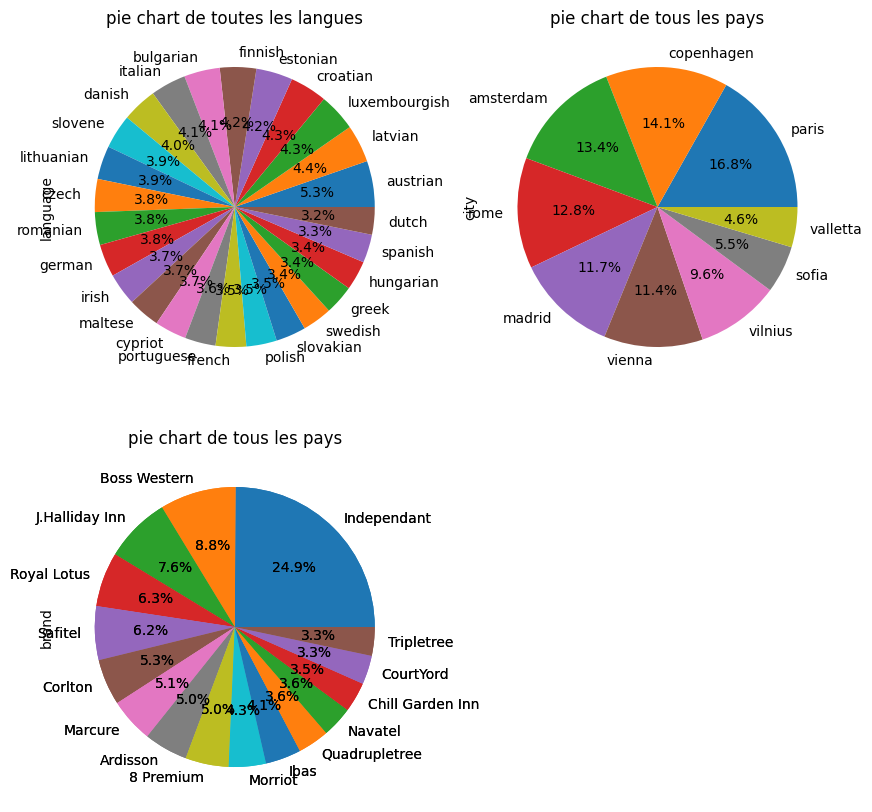

In [95]:
if descriptive_analysis: 
    plt.figure(figsize=(10,10))

    plt.subplot(2,2,1)
    pricing_requests['language'].value_counts().plot.pie( title="pie chart de toutes les langues", autopct='%1.1f%%')

    plt.subplot(2,2,2)
    pricing_requests['city'].value_counts().plot.pie( title="pie chart de tous les pays", autopct='%1.1f%%')


    plt.subplot(2,2,3)
    pricing_requests['brand'].value_counts().plot.pie( title="pie chart de toutes les brands", autopct='%1.1f%%')
    plt.subplot(2,2,3)
    pricing_requests['brand'].value_counts().plot.pie( title="pie chart de tous les pays", autopct='%1.1f%%')

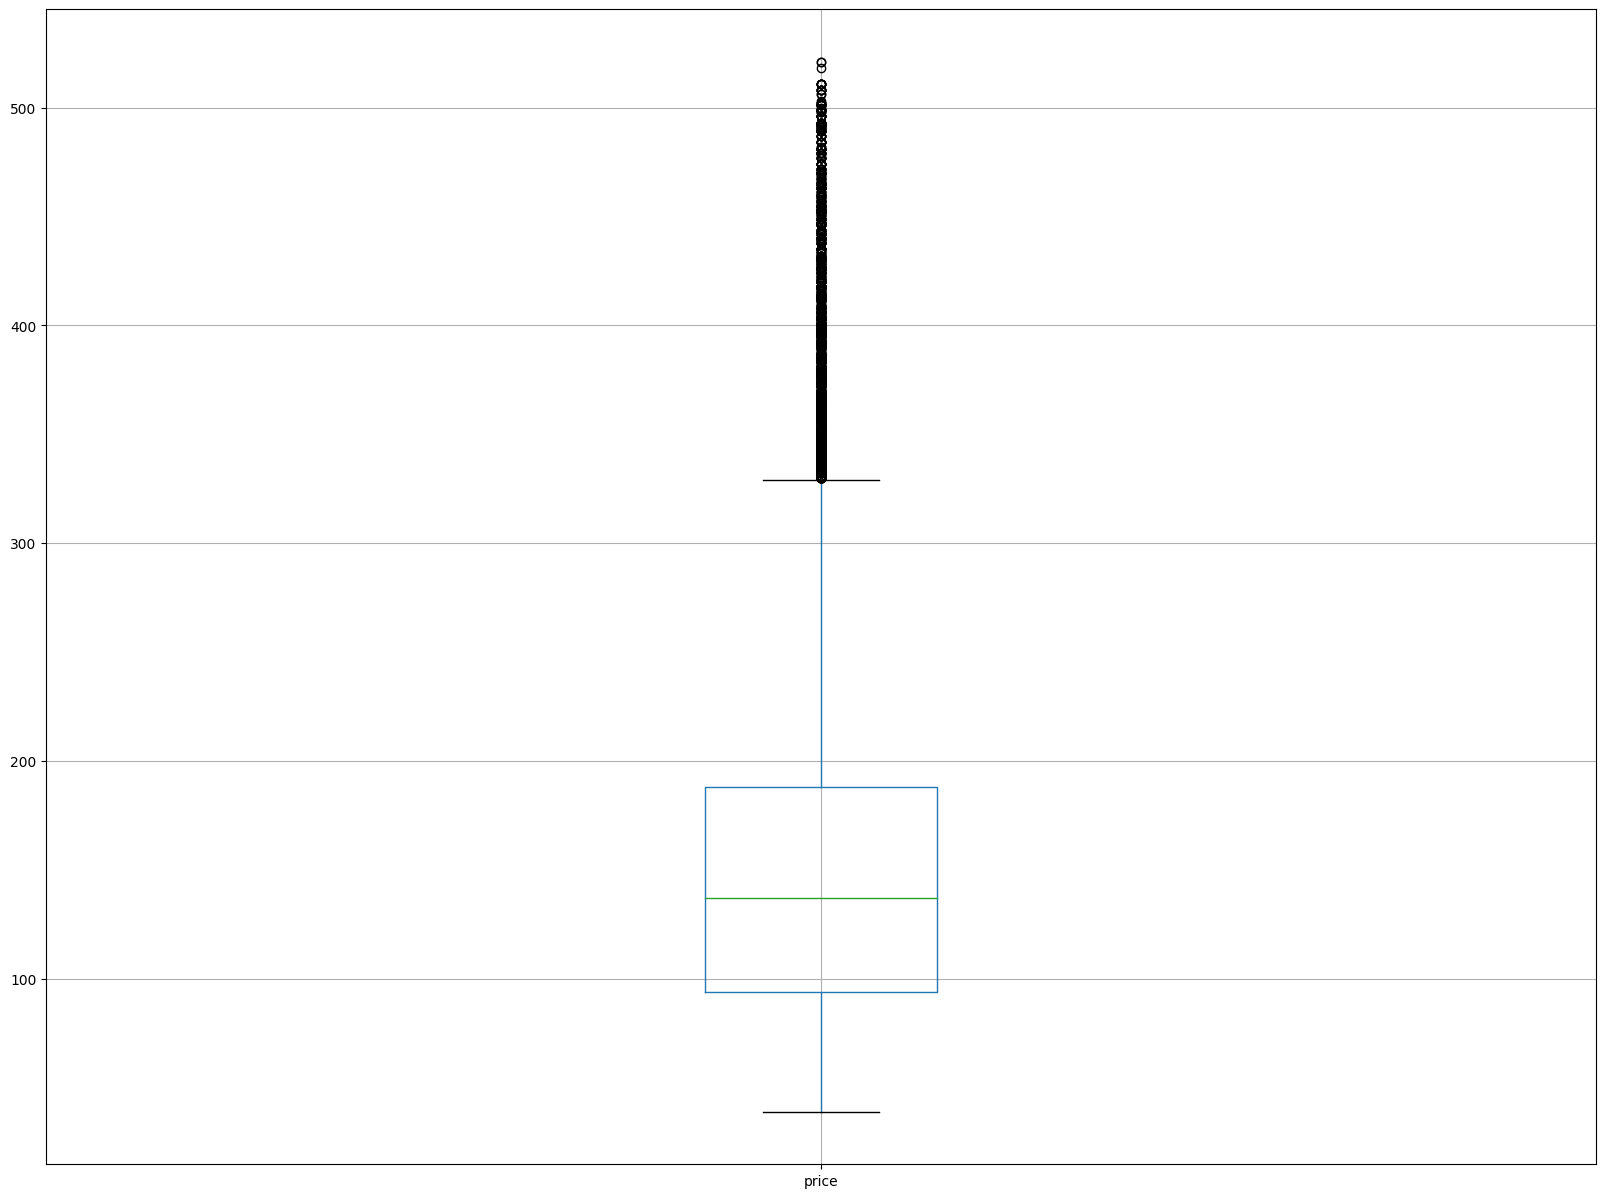

In [96]:
fig2 = plt.figure(figsize=(20, 15))
boxplot = pricing_requests.boxplot(column=["price"])

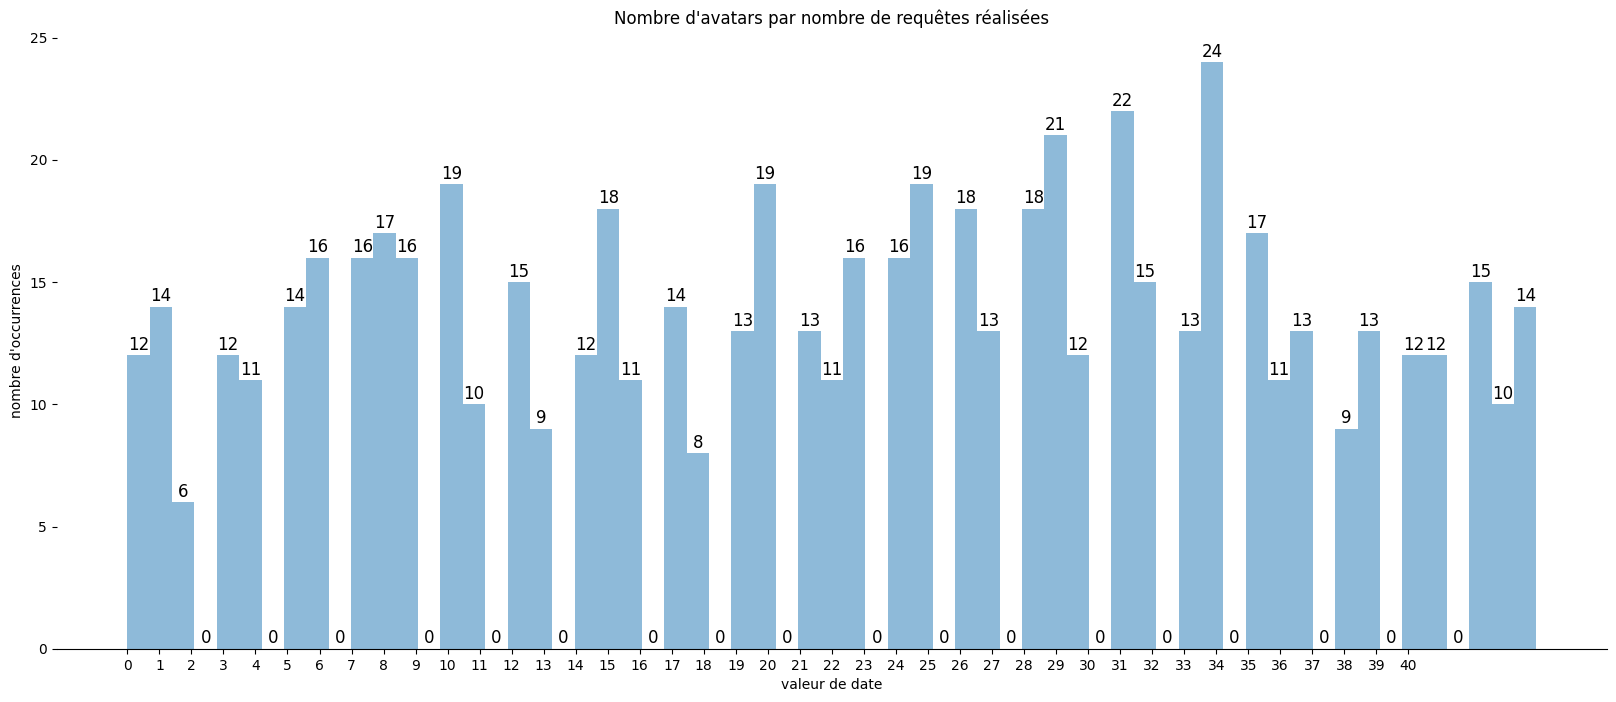

In [99]:
plotDates(pricing_requests)

Text(0.5, 1.0, 'price')

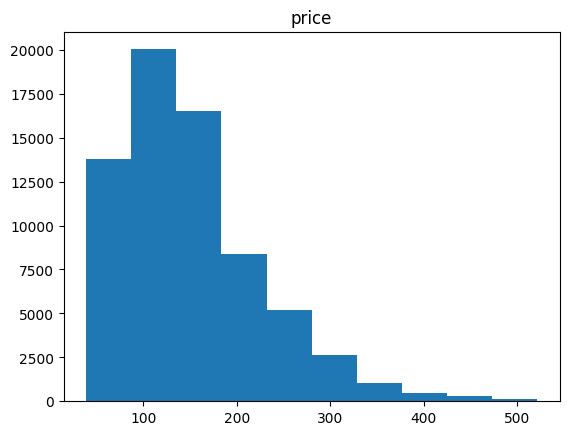

In [100]:
plt.hist(pricing_requests["price"])
plt.title("price")

In [101]:
# Variables explicatives
requests_pricingDum=pd.get_dummies(pricing_requests[["city", "language", "mobile","parking","pool","children_policy"]])
request_pricingQuant=pricing_requests[["hotel_id", "stock","request_number", "date"]]
dfC=pd.concat([requests_pricingDum,request_pricingQuant],axis=1)
dfC.columns

Index(['parking', 'pool', 'children_policy', 'city_amsterdam',
       'city_copenhagen', 'city_madrid', 'city_paris', 'city_rome',
       'city_sofia', 'city_valletta', 'city_vienna', 'city_vilnius',
       'language_austrian', 'language_bulgarian', 'language_croatian',
       'language_cypriot', 'language_czech', 'language_danish',
       'language_dutch', 'language_estonian', 'language_finnish',
       'language_french', 'language_german', 'language_greek',
       'language_hungarian', 'language_irish', 'language_italian',
       'language_latvian', 'language_lithuanian', 'language_luxembourgish',
       'language_maltese', 'language_polish', 'language_portuguese',
       'language_romanian', 'language_slovakian', 'language_slovene',
       'language_spanish', 'language_swedish', 'mobile_0', 'mobile_1',
       'hotel_id', 'stock', 'request_number', 'date'],
      dtype='object')

In [ ]:
# attention : bien renormaliser 

In [102]:
dfC

,parking,pool,children_policy,city_amsterdam,city_copenhagen,city_madrid,city_paris,city_rome,city_sofia,city_valletta,...,language_slovakian,language_slovene,language_spanish,language_swedish,mobile_0,mobile_1,hotel_id,stock,request_number,date
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,105,102,1,39
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,880,81,1,39
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,588,108,1,39
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,352,84,1,39
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,925,83,1,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68537,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,905,0,639,6
68538,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,325,0,639,6
68539,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,719,6,639,6
68540,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,965,6,639,6


In [44]:
# variable à expliquer
Y_price=pricing_requests["price"]

In [45]:
# construction de l'échantillon d'apprentissage :
X_train,X_test,Y_price_train,Y_price_test=train_test_split(dfC,Y_price,test_size=0.2,random_state=11)#on sélectionne rain_class pour la classification


In [46]:


params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, Y_price_train)
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)

KeyboardInterrupt: 

In [47]:
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(Y_price_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)

#plt.axvline((np.arange(params["n_estimators"]) + 1)[np.argmin(test_score)])
plt.axvline(200)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance/squared error loss")
fig.tight_layout()
plt.show()

NameError: name 'test_score' is not defined

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param=[{"learning_rate":[0.01]}]#optimisation de m
rf= GridSearchCV(GradientBoostingRegressor(n_estimators=200),
        param,cv=5,n_jobs=-1)
boostOpt=rf.fit(X_train, Y_price_train)

# paramètre optimal
print("Error la moins élevée = %f, Meilleur paramètre = %s" % (1. -boostOpt.best_score_,boostOpt.best_params_)) #1-R^2


KeyboardInterrupt: 

In [ ]:
 1-boostOpt.score(X_test, Y_price_test)

In [49]:
X_test.shape

(13709, 60)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# définition des paramètres
forest = RandomForestRegressor(n_estimators=500, 
    max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFitreg = forest.fit(X_train,Y_price_train) 
print("erreur out of bag", 1-rfFitreg.oob_score_) #on calcule l'erreur out of bag. 

In [ ]:
importances = rfFitreg.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(dfC.columns[indices[f]], importances[indices[f]])

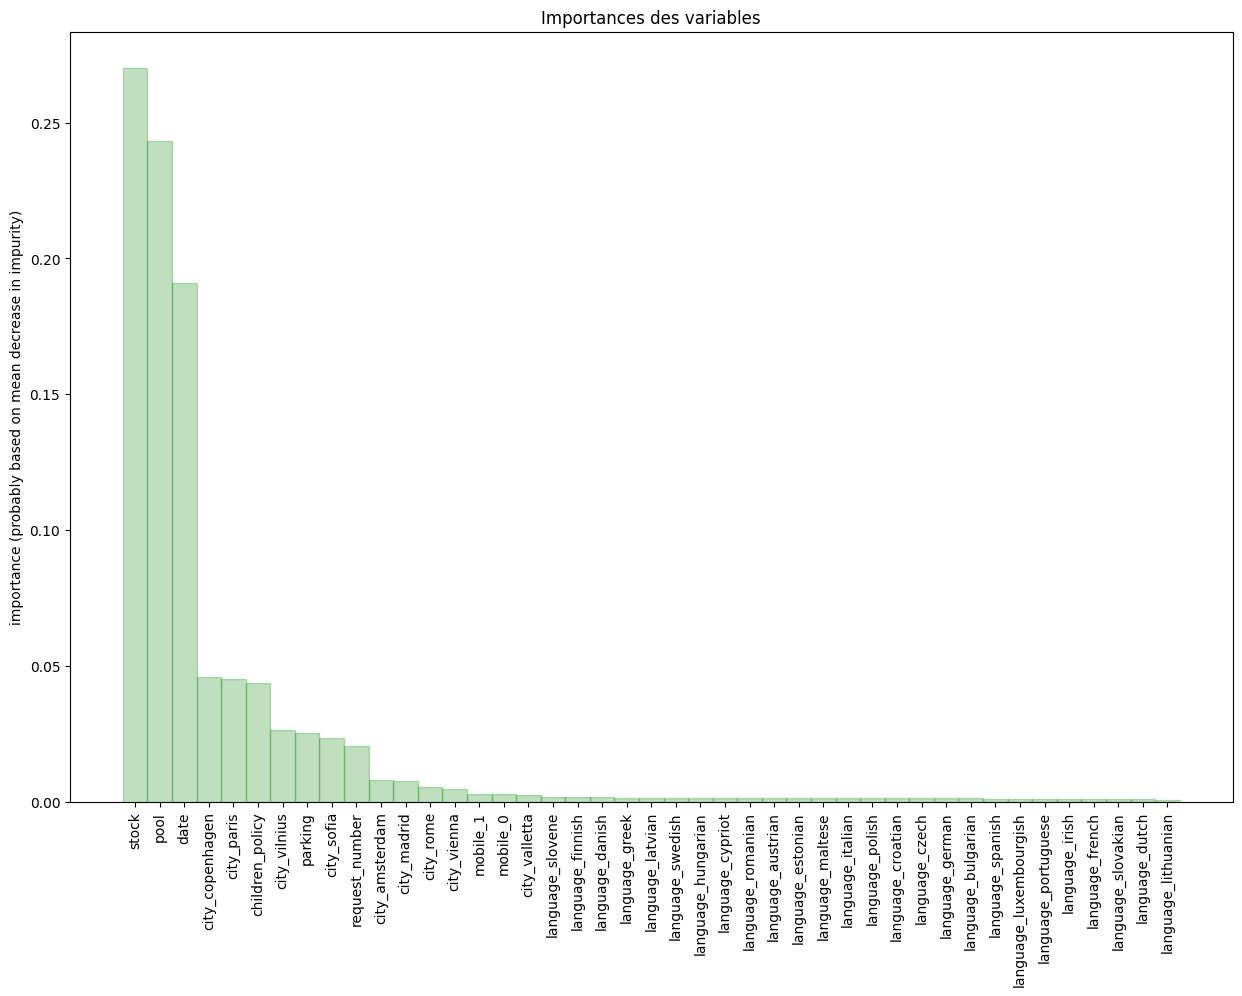

In [69]:


plt.figure(figsize=((15,10)))
plt.bar(list(dfC.columns[indices]), importances[indices],1, color='g', edgecolor="g", alpha=0.25)
plt.title("Importances des variables")
plt.ylabel("importance (probably based on mean decrease in impurity)")
plt.xticks(rotation=90)
plt.show()



In [62]:
 1-rfFitreg.score(X_test,Y_price_test)

0.05679773514931641